In [5]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

In [60]:
# === CONFIG ===
csv_path = "cleaned_labeled_partitions.csv"  
embedding_dim = 500
num_folds = 2
sgd_max_iter = 1000

# === LOAD CSV DATA ===
df = pd.read_csv(csv_path)
texts = df["text"].astype(str).tolist()
df['num_label'] = pd.factorize(df['label'])[0]
df = df.drop('label', axis=1)
labels = df["num_label"].astype(int).tolist()

df

,text,num_label
0,studying transcriptome response environmental ...,0
1,strategy showed similar performance machine le...,0
2,biotechnology generated spatiotemporal express...,0
3,promising target prediction hf immunological p...,0
4,important role tumor progression stromal chang...,0
...,...,...
995,motor disability disease activity performance ...,4
996,prediction model according diagnostic step res...,4
997,prediction model may provide information regar...,4
998,increasing interest machine learningbased pred...,4


500000

In [56]:
# === CONVERT TEXT TO AVERAGED EMBEDDINGS ===
def text_to_vec(tokens, model, dim):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if not vectors:
        return np.zeros(dim)
    return np.mean(vectors, axis=0)

In [77]:
sentences = [text.split() for text in texts]  # basic whitespace tokenizer

In [78]:
w2v_model = Word2Vec(
    sentences,
    vector_size=embedding_dim,
    window=5,
    min_count=1,
    workers=4,
    sg=1  # skip-gram
)

X = np.array([text_to_vec(sent, w2v_model, embedding_dim) for sent in tqdm(texts)])
y = np.array(labels)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 3140.84it/s]


In [79]:

# === CROSS-VALIDATION WITH SGD CLASSIFIER ===
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
fold = 1

for train_index, test_index in skf.split(X, y):
    print(f"\n--- Fold {fold} ---")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = SGDClassifier(loss='log_loss', max_iter=sgd_max_iter, tol=1e-3)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    fold += 1


--- Fold 1 ---
Accuracy: 0.2600
              precision    recall  f1-score   support

           0       0.24      0.35      0.29        20
           1       0.00      0.00      0.00        20
           2       0.62      0.25      0.36        20
           3       0.22      0.70      0.34        20
           4       0.00      0.00      0.00        20

    accuracy                           0.26       100
   macro avg       0.22      0.26      0.20       100
weighted avg       0.22      0.26      0.20       100


--- Fold 2 ---


/home/eigentlichervogel/generic-ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/eigentlichervogel/generic-ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/eigentlichervogel/generic-ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

Accuracy: 0.2000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.20      1.00      0.34        20

    accuracy                           0.20       100
   macro avg       0.04      0.20      0.07       100
weighted avg       0.04      0.20      0.07       100


--- Fold 3 ---
Accuracy: 0.2000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.20      1.00      0.33        20

    accuracy                           0.20       100
   macro avg       0.04      0.20      0.07       100
weighted avg       0.04    

/home/eigentlichervogel/generic-ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/eigentlichervogel/generic-ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/eigentlichervogel/generic-ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

Accuracy: 0.2000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        20
           2       0.20      1.00      0.33        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20

    accuracy                           0.20       100
   macro avg       0.04      0.20      0.07       100
weighted avg       0.04      0.20      0.07       100


--- Fold 5 ---
Accuracy: 0.2000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.20      1.00      0.33        20
           4       0.00      0.00      0.00        20

    accuracy                           0.20       100
   macro avg       0.04      0.20      0.07       100
weighted avg       0.04    

/home/eigentlichervogel/generic-ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/eigentlichervogel/generic-ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/eigentlichervogel/generic-ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

Accuracy: 0.2000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        20
           2       0.20      1.00      0.33        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20

    accuracy                           0.20       100
   macro avg       0.04      0.20      0.07       100
weighted avg       0.04      0.20      0.07       100


--- Fold 7 ---
Accuracy: 0.2000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.20      1.00      0.33        20

    accuracy                           0.20       100
   macro avg       0.04      0.20      0.07       100
weighted avg       0.04    

/home/eigentlichervogel/generic-ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/eigentlichervogel/generic-ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/eigentlichervogel/generic-ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

Accuracy: 0.1800
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.20      0.90      0.33        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20

    accuracy                           0.18       100
   macro avg       0.04      0.18      0.07       100
weighted avg       0.04      0.18      0.07       100


--- Fold 9 ---
Accuracy: 0.1800
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.19      0.90      0.31        20

    accuracy                           0.18       100
   macro avg       0.04      0.18      0.06       100
weighted avg       0.04    

/home/eigentlichervogel/generic-ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/eigentlichervogel/generic-ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/eigentlichervogel/generic-ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [64]:
# Load preprocessed TF-IDF features
df_tfidf = pd.read_pickle('tfi.pkl')
print(df_tfidf)

     tfidf_0  tfidf_1  tfidf_2  tfidf_3  tfidf_4  tfidf_5  tfidf_6  tfidf_7  \
0        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
995      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
996      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
997      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
998      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
999      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

     tfidf_8  tfidf_9  ...  tfidf_11685  tfidf_1168

In [69]:
X = df_tfidf.drop(['num_label'], axis=1).values
y = df_tfidf['num_label'].values
classes = np.unique(y)
num_folds = 10
# === CROSS-VALIDATION WITH SGD CLASSIFIER ===
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
fold = 1

for train_index, test_index in skf.split(X, y):
    print(f"\n--- Fold {fold} ---")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = SGDClassifier(loss='log_loss', max_iter=sgd_max_iter, tol=1e-3)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    fold += 1


--- Fold 1 ---
Accuracy: 0.8900
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.82      0.90      0.86        20
           2       1.00      0.80      0.89        20
           3       0.90      0.90      0.90        20
           4       0.83      1.00      0.91        20

    accuracy                           0.89       100
   macro avg       0.90      0.89      0.89       100
weighted avg       0.90      0.89      0.89       100


--- Fold 2 ---
Accuracy: 0.9000
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       1.00      0.80      0.89        20
           2       0.90      0.95      0.93        20
           3       0.94      0.85      0.89        20
           4       0.74      1.00      0.85        20

    accuracy                           0.90       100
   macro avg       0.92      0.90      0.90       100
weighted av

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (confusion_matrix, classification_report, 
                             roc_auc_score, roc_curve, auc)
from sklearn.preprocessing import label_binarize
from itertools import cycle
#  from scipy import interp


X = df_tfidf.drop(['num_label'], axis=1).values
y = df_tfidf['num_label'].values
# Assuming you have your BOW features in X and labels in y
# X = your bag-of-words features (n_samples, n_features)
# y = your labels (n_samples,) with values 0-4 for 5 classes

# Example data if you don't have your own
# from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, n_features=100, n_classes=5, 
#                           n_informative=25, random_state=42)

# Binarize the labels for ROC-AUC
y_bin = label_binarize(y, classes=[0, 1, 2, 3, 4])
n_classes = y_bin.shape[1]

# Define the parameter grid for grid search
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'loss': ['log_loss'],
    'penalty': ['l2', 'l1'],
    'max_iter': [1000],
    'tol': [1e-3, 1e-4],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'eta0': [0.01, 0.1]
}

# Create SGD classifier with log loss (for probabilities)
sgd = SGDClassifier(random_state=42)

# Set up 10-fold cross-validated grid search
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, 
                          cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)

# Perform grid search
print("Performing grid search...")
grid_search.fit(X, y)

# Print best parameters and score
print("\nBest parameters found:")
print(grid_search.best_params_)
print(f"\nBest cross-validation accuracy: {grid_search.best_score_:.4f}")

# Get the best estimator
best_sgd = grid_search.best_estimator_


Performing grid search...
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best parameters found:
{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate': 'constant', 'loss': 'log_loss', 'max_iter': 1000, 'penalty': 'l1', 'tol': 0.0001}

Best cross-validation accuracy: 0.9380



Classification report with best estimator (10-fold CV):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       200
           1       0.94      0.88      0.90       200
           2       0.92      0.94      0.93       200
           3       0.95      0.93      0.94       200
           4       0.93      0.99      0.96       200

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



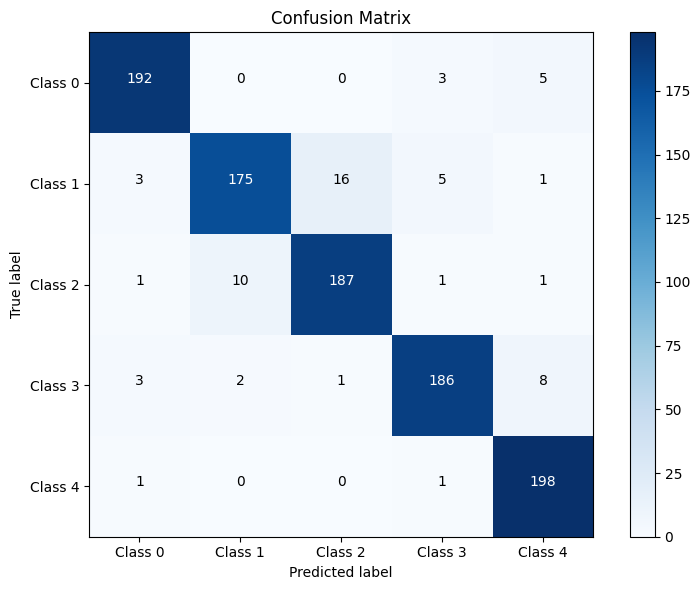

KeyboardInterrupt: 

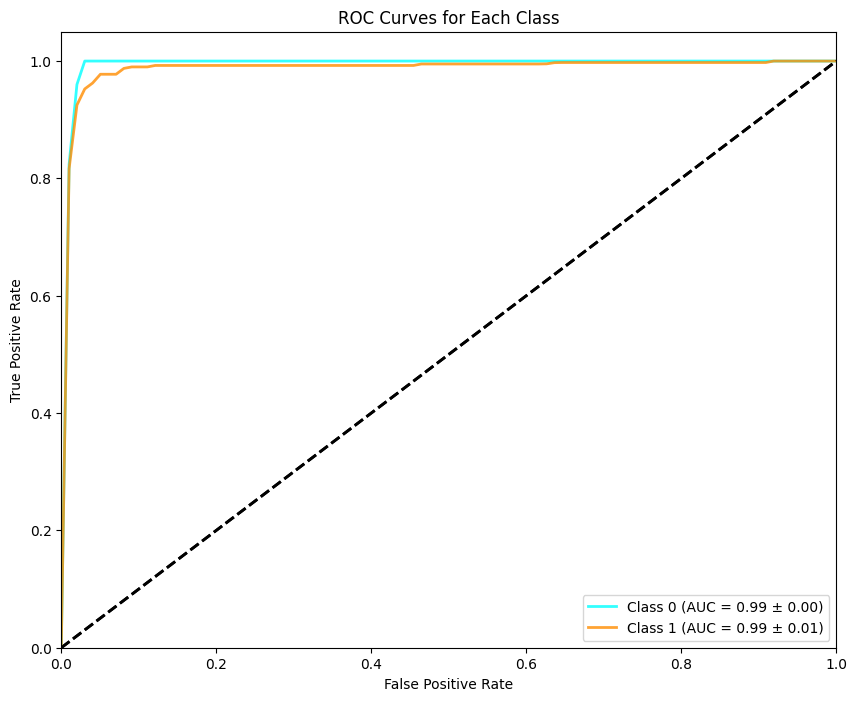

In [76]:
from sklearn.model_selection import cross_val_predict

print("\nClassification report with best estimator (10-fold CV):")
y_pred = cross_val_predict(best_sgd, X, y, cv=cv)
print(classification_report(y, y_pred))

# Confusion matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(5)
plt.xticks(tick_marks, [f"Class {i}" for i in range(5)])
plt.yticks(tick_marks, [f"Class {i}" for i in range(5)])

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# ROC-AUC curves
plt.figure(figsize=(10, 8))

# Compute ROC curve and ROC area for each class using cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Binarize the output
y_bin = label_binarize(y, classes=[0, 1, 2, 3, 4])
n_classes = y_bin.shape[1]

# Initialize variables for ROC curves
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(n_classes), colors):
    # Compute ROC curve and area under the curve for each fold
    for train, test in cv.split(X, y):
        best_sgd.fit(X[train], y[train])
        if hasattr(best_sgd, "predict_proba"):
            probas_ = best_sgd.predict_proba(X[test])
        else:  # use decision function
            probas_ = best_sgd.decision_function(X[test])
            probas_ = np.exp(probas_) / np.sum(np.exp(probas_), axis=1, keepdims=True)
        
        # Compute ROC curve
        fpr, tpr, thresholds = roc_curve(y_bin[test, i], probas_[:, i])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
    
    # Plot the mean ROC curve
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color=color,
             label=f'Class {i} (AUC = {mean_auc:.2f} ± {std_auc:.2f})',
             lw=2, alpha=.8)
    
    # Plot the random guessing line
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Each Class')
    plt.legend(loc="lower right")

plt.show()

# Print average ROC-AUC score
roc_auc_scores = []
for train, test in cv.split(X, y):
    best_sgd.fit(X[train], y[train])
    if hasattr(best_sgd, "predict_proba"):
        y_score = best_sgd.predict_proba(X[test])
    else:
        y_score = best_sgd.decision_function(X[test])
    roc_auc_scores.append(roc_auc_score(y_bin[test], y_score, multi_class='ovr'))

print(f"\nAverage ROC-AUC score (One-vs-Rest): {np.mean(roc_auc_scores):.4f} (±{np.std(roc_auc_scores):.4f})")